# Import Library

In [1]:
import os
seed = 0
os.environ['PYTHONHASHSEED']=str(seed)

In [2]:
import pandas as pd
import numpy as np
import cv2
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import  StandardScaler
# import sys
# !{sys.executable} -m pip install torchvision

In [3]:
# import sys    
# !{sys.executable} -m pip install hypopt

In [4]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 30.7 MB/s 


In [5]:
import tensorflow as tf

# tf.enable_eager_execution()
# tf.config.run_functions_eagerly(True)
# tf.compat.v1.enable_eager_execution()
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten , Input ,BatchNormalization, Concatenate, Layer , Maximum , Softmax
from tensorflow.keras.layers import  GlobalAveragePooling2D, AveragePooling2D , Conv1D , MaxPooling1D, Average, Dropout, LayerNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, GRU, ReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,balanced_accuracy_score
import joblib

# from keras.applications import vgg16
# from keras.applications.efficientnet import EfficientNetB3 


from tensorflow.keras.applications import ResNet50, EfficientNetB2, MobileNetV3Large

In [6]:
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier

# import pytorch_tabnet
# from pytorch_tabnet.tab_model import TabNetClassifier
# import torch

In [7]:
tf.__version__

'2.8.0'

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Function 

In [9]:
def draw_cm (y_true,y_pred):
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_true, y_pred,normalize = 'true')
  ds = []
  for i in range(len(cm)):
    kk = round(cm[i][i], 4)
    ds.append(kk)
  cm_df = pd.DataFrame(cm,
                      index = [       '?????' ,
                                      'Falling hands' ,
                                      'Falling knees' ,
                                      'Falling backwards',
                                      'Falling sideward' ,
                                      ' Falling chair',
                                      ' Walking',
                                      'Standing' ,
                                      'Sitting' ,
                                      'Picking object' ,
                                      'Jumping' ,
                                      'Laying' ], 
                      columns = [       '?????' ,
                                      'Falling hands' ,
                                      'Falling knees' ,
                                      'Falling backwards',
                                      'Falling sideward' ,
                                      ' Falling chair',
                                      ' Walking',
                                      'Standing' ,
                                      'Sitting' ,
                                      'Picking object' ,
                                      'Jumping' ,
                                      'Laying' ])


  import seaborn as sns
  sns.color_palette("tab10")
  #Plotting the confusion matrix
  plt.figure(figsize=(10,10))
  sns.heatmap(cm_df, annot=True,fmt='.2%', cmap='gist_stern_r')
  plt.title('Confusion Matrix')
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
# plt.savefig('confusion.png')
  return ds


def display_result(y_test , y_pred) :
    print('Accuracy score : ', accuracy_score(y_test , y_pred) )
    print('Precision score : ', precision_score(y_test , y_pred, average='weighted'))
    print('Recall score : ', recall_score(y_test , y_pred, average='weighted'))
    print('F1 score : ', f1_score(y_test , y_pred, average='weighted'))
    

def display_result123(y_test , y_pred) :
    print('Accuracy score : ', accuracy_score(y_test , y_pred) )
    print('Precision score : ', precision_score(y_test , y_pred, average='macro'))
    print('Recall score : ', recall_score(y_test , y_pred, average='macro'))
    print('F1 score : ', f1_score(y_test , y_pred, average='macro'))
    

# LOAD DATA 

In [10]:

img1 = np.load('/content/drive/MyDrive/Colab Notebooks/Journal/All_data/3D /image_1_3D_36.npy')
label1 = np.load('//content/drive/MyDrive/Colab Notebooks/Journal/All_data/3D /label_1_3D_36.npy')
img1.shape,label1.shape

label1 = np.where(label1 == 20 , 0, label1)
X_train_1,X_rem_1,y_train_1,y_rem_1 = train_test_split(img1, label1, 
                                                       train_size = 0.6,
                                                       random_state = 42,
                                                       stratify= label1)

X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_rem_1, y_rem_1, 
                                                        test_size = 0.5, 
                                                        random_state = 42,
                                                        stratify= y_rem_1)


print('X_train_1 shape : ',X_train_1.shape)
print('X_test_1 shape : ',X_test_1.shape)
print('X_val_1 shape : ',X_val_1.shape)
print('y_train_1 shape : ',y_train_1.shape)
print('y_test_1 shape : ',y_test_1.shape)
print('y_val_1 shape : ',y_val_1.shape)


Y_train_1 = to_categorical(y_train_1, 12)
Y_test_1 = to_categorical(y_test_1, 12)
Y_val_1 = to_categorical(y_val_1, 12)

print('Y_train_1 shape : ',Y_train_1.shape)
print('Y_test_1 shape : ',Y_test_1.shape)
print('Y_val_1 shape : ',Y_val_1.shape)



frame = 36
X_train_1 = X_train_1.reshape(X_train_1.shape[0], 32, 32, frame, 1)
X_test_1 = X_test_1.reshape(X_test_1.shape[0], 32, 32, frame, 1)
X_val_1 = X_val_1.reshape(X_val_1.shape[0], 32, 32, frame, 1)

X_train_1 shape :  (48294, 36, 32, 32)
X_test_1 shape :  (16099, 36, 32, 32)
X_val_1 shape :  (16098, 36, 32, 32)
y_train_1 shape :  (48294,)
y_test_1 shape :  (16099,)
y_val_1 shape :  (16098,)
Y_train_1 shape :  (48294, 12)
Y_test_1 shape :  (16099, 12)
Y_val_1 shape :  (16098, 12)


In [11]:

img2 = np.load('/content/drive/MyDrive/Colab Notebooks/Journal/All_data/3D /image_2_3D_36.npy')
label2 = np.load('/content/drive/MyDrive/Colab Notebooks/Journal/All_data/3D /label_2_3D_36.npy')


label2 = np.where(label2 == 20 , 0, label2)


X_train_2,X_rem_2,y_train_2,y_rem_2 = train_test_split(img2, label2, 
                                                       train_size = 0.6,
                                                       random_state = 42,
                                                       stratify= label2)

X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_rem_2, y_rem_2, 
                                                        test_size = 0.5, 
                                                        random_state = 42,
                                                        stratify= y_rem_2)

print('X_train_2 shape : ',X_train_2.shape)
print('X_test_2 shape : ',X_test_2.shape)
print('X_val_2 shape : ',X_val_2.shape)
print('y_train_2 shape : ',y_train_2.shape)
print('y_test_2 shape : ',y_test_2.shape)
print('y_val_2 shape : ',y_val_2.shape)

Y_train_2 = to_categorical(y_train_2, 12)
Y_test_2 = to_categorical(y_test_2, 12)
Y_val_2 = to_categorical(y_val_2, 12)

print('Y_train_2 shape : ',Y_train_2.shape)
print('Y_test_2 shape : ',Y_test_2.shape)
print('Y_val_2 shape : ',Y_val_2.shape)



frame = 36
X_train_2 = X_train_2.reshape(X_train_2.shape[0], 32, 32, frame, 1)
X_test_2 = X_test_2.reshape(X_test_2.shape[0], 32, 32, frame, 1)
X_val_2 = X_val_2.reshape(X_val_2.shape[0], 32, 32, frame, 1)


X_train_2 shape :  (48294, 36, 32, 32)
X_test_2 shape :  (16099, 36, 32, 32)
X_val_2 shape :  (16098, 36, 32, 32)
y_train_2 shape :  (48294,)
y_test_2 shape :  (16099,)
y_val_2 shape :  (16098,)
Y_train_2 shape :  (48294, 12)
Y_test_2 shape :  (16099, 12)
Y_val_2 shape :  (16098, 12)


# IMG1 

In [ ]:
def get_model(width=32, height=32, depth=36):
    """Build a 3D convolutional neural network model."""

    def set_seed(num_seed): 
        SEED = num_seed 
        # os.environ['PYTHONHASHSEED']=str(SEED)
        np.random.seed(SEED)
        tf.random.set_seed(SEED)
        rn.seed(SEED)
        session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
        sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
        tf.compat.v1.keras.backend.set_session(sess)
    set_seed(0)
    inputs = keras.Input((width, height, depth, 1))
    x = tf.keras.layers.Rescaling(scale = 1./255, offset=0.0)(inputs)
    x = tf.keras.layers.Conv3D(filters= 10, kernel_size=3, activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units = 1200,activation = 'relu')(x)
    x = tf.keras.layers.Dropout(rate = 0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(units = 600,activation = 'relu')(x)
    x = tf.keras.layers.Dropout(rate = 0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    outputs = tf.keras.layers.Dense(units=12, activation="softmax")(x)
    # Define the model.
    model = tf.keras.Model(inputs, outputs, name="3dcnn")
    return model


best model: 
504/504 [==============================] - 4s 7ms/step - loss: 0.0317 - categorical_accuracy: 0.9940 - precision: 0.9940 - recall: 0.9940 - f1_score: 0.9939
[0.03169587627053261, 0.9939743876457214, 0.9940361380577087, 0.9939743876457214, 0.9939081072807312]
504/504 [==============================] - 4s 9ms/step - loss: 0.0287 - categorical_accuracy: 0.9938 - precision: 0.9942 - recall: 0.9936 - f1_score: 0.9938
[0.028693456202745438, 0.9937884211540222, 0.9942196607589722, 0.9936020970344543, 0.9937569499015808]
Accuracy score :  0.9939744067586036
Precision score :  0.9938963420780287
Recall score :  0.9939744067586036
F1 score :  0.993908025379793
********************
Accuracy score :  0.9937884340642276
Precision score :  0.9937695083475035
Recall score :  0.9937884340642276
F1 score :  0.9937569809787993


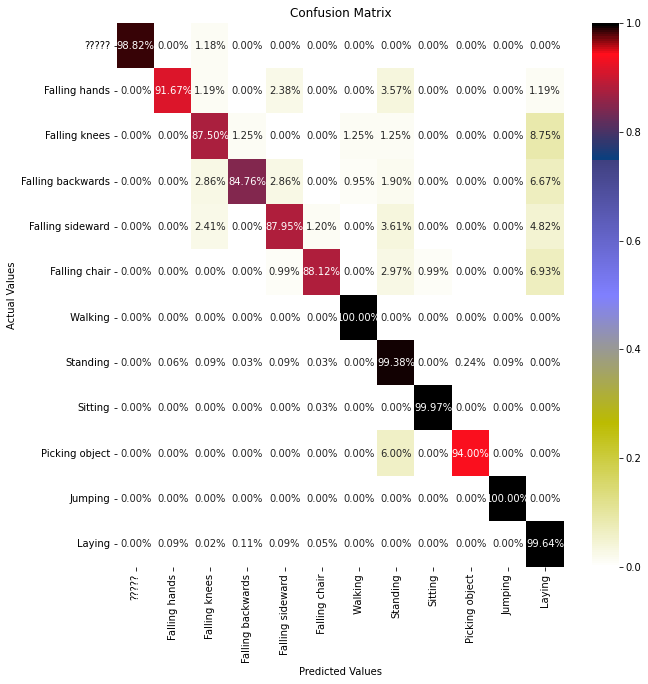

[0.9882, 0.9167, 0.875, 0.8476, 0.8795, 0.8812, 1.0, 0.9938, 0.9997, 0.94, 1.0, 0.9964]


In [ ]:
model = get_model()

model.compile(
              optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.98, rho=0.95, epsilon=1e-08, decay=0.0),
              loss = 'categorical_crossentropy' ,
              metrics =[
                       keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall'),
                       tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),
                          
              ])

# LOAD OUR PRE-TRAINED WEIFHT 

print("best model: ")
model.load_weights("/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-IMG1.hdf5")
print(model.evaluate(X_val_1 , Y_val_1))
print(model.evaluate(X_test_1 , Y_test_1))


y_val = np.argmax(model.predict(X_val_1 ), axis = 1 )
display_result(y_val_1, y_val)

print('*'*20)
y_test = np.argmax(model.predict(X_test_1 ), axis = 1 )
display_result(y_test_1, y_test)


k = draw_cm(y_test_1,y_test) 
print(k)


In [ ]:
# UNCOMMENT IF U WANT TO TRAIN THE MODEL 


# model = get_model()
# model.summary()

# model.compile(
#               optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.98, rho=0.95, epsilon=1e-08, decay=0.0),
#               loss = 'categorical_crossentropy' ,
#               metrics =[
#                        keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
#                        keras.metrics.Precision(name='precision'),
#                        keras.metrics.Recall(name='recall'),
#                        tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),
                          
#               ])

# f1_callback = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-IMG1.hdf5", 
#                               monitor='val_f1_score', 
#                               verbose=1, 
#                               save_best_only=True,
#                               mode='max')


# history =model.fit(
#                                 X_train_1,Y_train_1,
#                                 epochs=30,
#                                 batch_size= 2**8,
#                                 validation_data=(X_val_1,Y_val_1),
#                                 callbacks = [f1_callback]
#                 )


# print("best model: ")
# model.load_weights("/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-IMG1.hdf5")
# print(model.evaluate(X_val_1 , Y_val_1))
# print(model.evaluate(X_test_1 , Y_test_1))


# y_val = np.argmax(model.predict(X_val_1 ), axis = 1 )
# display_result(y_val_1, y_val)

# print('*'*20)
# y_test = np.argmax(model.predict(X_test_1 ), axis = 1 )
# display_result(y_test_1, y_test)


# IMG 2

In [ ]:
def get_model(width=32, height=32, depth=36):
    """Build a 3D convolutional neural network model."""

    def set_seed(num_seed): 
        SEED = num_seed 
        # os.environ['PYTHONHASHSEED']=str(SEED)
        np.random.seed(SEED)
        tf.random.set_seed(SEED)
        rn.seed(SEED)
        session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
        sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
        tf.compat.v1.keras.backend.set_session(sess)
    set_seed(0)
    inputs = keras.Input((width, height, depth, 1))
    x = tf.keras.layers.Rescaling(scale = 1./255, offset=0.0)(inputs)
    x = tf.keras.layers.Conv3D(filters= 10, kernel_size=3, activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units = 1200,activation = 'relu')(x)
    x = tf.keras.layers.Dropout(rate = 0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(units = 600,activation = 'relu')(x)
    x = tf.keras.layers.Dropout(rate = 0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    outputs = tf.keras.layers.Dense(units=12, activation="softmax")(x)

    # Define the model.
    model = tf.keras.Model(inputs, outputs, name="3dcnn")
    return model

best model: 
504/504 [==============================] - 4s 8ms/step - loss: 0.0224 - categorical_accuracy: 0.9945 - precision: 0.9945 - recall: 0.9944 - f1_score: 0.9945
[0.022398846223950386, 0.9945334792137146, 0.9945328235626221, 0.9944092631340027, 0.9945147037506104]
504/504 [==============================] - 4s 8ms/step - loss: 0.0245 - categorical_accuracy: 0.9940 - precision: 0.9941 - recall: 0.9938 - f1_score: 0.9940
[0.02454245835542679, 0.9940369129180908, 0.9940971732139587, 0.9937884211540222, 0.9940392971038818]
Accuracy score :  0.9945334824201765
Precision score :  0.9945300317203347
Recall score :  0.9945334824201765
F1 score :  0.9945146330556927
********************
Accuracy score :  0.9940368967016585
Precision score :  0.9941214555875707
Recall score :  0.9940368967016585
F1 score :  0.9940392984392715


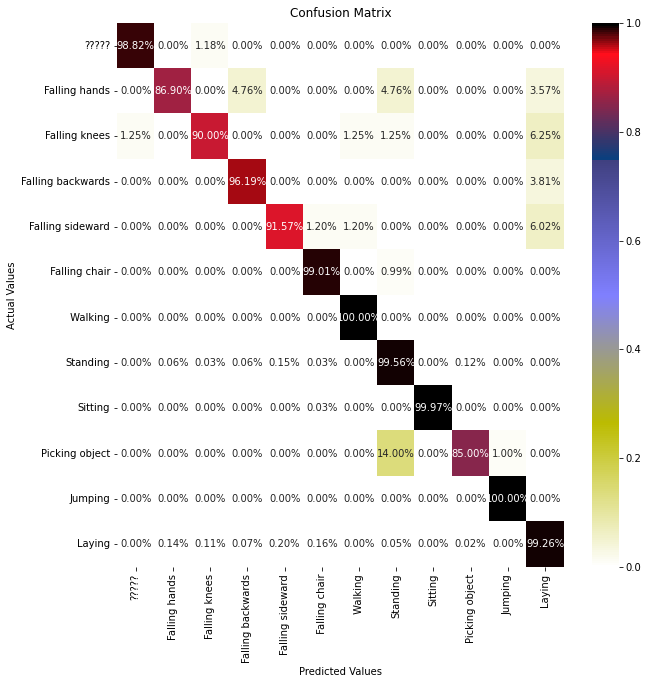

[0.9882, 0.869, 0.9, 0.9619, 0.9157, 0.9901, 1.0, 0.9956, 0.9997, 0.85, 1.0, 0.9926]


In [ ]:
model = get_model()

model.compile(
              optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.92, rho=0.95, epsilon=1e-08, decay=0.0),
              loss = 'categorical_crossentropy' ,
              metrics =[
                       keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall'),
                       tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),
                          
              ])

print("best model: ")
model.load_weights("/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-IMG2.hdf5")
print(model.evaluate(X_val_2 , Y_val_2))
print(model.evaluate(X_test_2 , Y_test_2))


y_val = np.argmax(model.predict(X_val_2 ), axis = 1 )
display_result(y_val_2, y_val)

print('*'*20)
y_test = np.argmax(model.predict(X_test_2 ), axis = 1 )
display_result(y_test_2, y_test)


k = draw_cm(y_test_2,y_test) 
print(k)

In [ ]:
# UNCOMMENT IF U WANT TO TRAIN THE MODEL 

# model = get_model()

# model.compile(
#               optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.92, rho=0.95, epsilon=1e-08, decay=0.0),
#               loss = 'categorical_crossentropy' ,
#               metrics =[
#                        keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
#                        keras.metrics.Precision(name='precision'),
#                        keras.metrics.Recall(name='recall'),
#                        tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),
                          
#               ])


# f1_callback = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-IMG2.hdf5", 
#                               monitor='val_f1_score', 
#                               verbose=1, 
#                               save_best_only=True,
#                               mode='max')
# history =model.fit(
#                                 X_train_2,Y_train_2,
#                                 epochs=30,
#                                 batch_size= 2**8,
#                                 validation_data=(X_val_2,Y_val_2),
#                                 callbacks = [f1_callback])



# print("best model: ")

# model.load_weights("/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-IMG2.hdf5")
# print(model.evaluate(X_val_2 , Y_val_2))
# print(model.evaluate(X_test_2 , Y_test_2))


# y_val = np.argmax(model.predict(X_val_2 ), axis = 1 )
# display_result(y_val_2, y_val)

# print('*'*20)
# y_test = np.argmax(model.predict(X_test_2 ), axis = 1 )
# display_result(y_test_2, y_test)


# k = draw_cm(y_test_2,y_test) 
# print(k)



# IMG 1 + 2

In [12]:
def model_concat(width=32, height=32, depth=36, method = 'concat'):
    """Build a 3D convolutional neural network model."""

    def set_seed(num_seed): 
        SEED = num_seed 
        # os.environ['PYTHONHASHSEED']=str(SEED)
        np.random.seed(SEED)
        tf.random.set_seed(SEED)
        rn.seed(SEED)
        session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
        sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
        tf.compat.v1.keras.backend.set_session(sess)
    set_seed(0)
    # ----------------------------------------------------------------------
    input1 = keras.Input((width, height, depth, 1))
    x1 = tf.keras.layers.Rescaling(scale = 1./255, offset=0.0)(input1)
    x1 = tf.keras.layers.Conv3D(filters= 10, kernel_size=3, activation="relu")(x1)
    x1 = tf.keras.layers.MaxPool3D(pool_size=2)(x1)
    x1 = tf.keras.layers.BatchNormalization()(x1)
    x1 = tf.keras.layers.Flatten()(x1)
    # ----------------------------------------------------------------------
    x1 = tf.keras.layers.Dense(units = 1200,activation = 'relu')(x1)
    x1 = tf.keras.layers.Dropout(rate = 0.2)(x1)
    x1 = tf.keras.layers.BatchNormalization()(x1)
    # ----------------------------------------------------------------------
    x1 = tf.keras.layers.Dense(units = 600,activation = 'relu')(x1)
    x1 = tf.keras.layers.Dropout(rate = 0.2)(x1)
    x1 = tf.keras.layers.BatchNormalization()(x1)
    # ----------------------------------------------------------------------
    output1 = tf.keras.layers.Dense(units=12)(x1)
# #################################################################################
    input2 = keras.Input((width, height, depth, 1))
    x2 = tf.keras.layers.Rescaling(scale = 1./255, offset=0.0)(input2)
    x2 = tf.keras.layers.Conv3D(filters= 10, kernel_size=3, activation="relu")(x2)
    x2 = tf.keras.layers.MaxPool3D(pool_size=2)(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)
    x2 = tf.keras.layers.Flatten()(x2)
    # ----------------------------------------------------------------------
    x2 = tf.keras.layers.Dense(units = 1200,activation = 'relu')(x2)
    x2 = tf.keras.layers.Dropout(rate = 0.2)(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)
    # ----------------------------------------------------------------------
    x2 = tf.keras.layers.Dense(units = 600,activation = 'relu')(x2)
    x2 = tf.keras.layers.Dropout(rate = 0.2)(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)
    # ----------------------------------------------------------------------
    output2 = tf.keras.layers.Dense(units=12)(x2)

    if method  == 'concat' :
      concat = tf.keras.layers.Concatenate()([output1,output2])
      concat = tf.keras.layers.Dense(units = 200,activation = 'relu')(concat)
      concat = tf.keras.layers.Dropout(rate = 0.2)(concat)
      concat = tf.keras.layers.BatchNormalization()(concat)
      outputs = tf.keras.layers.Dense(units = 12,activation = 'softmax')(concat)
    elif method == 'max' :
      # output1 = tf.keras.layers.Softmax()(output1)
      # output2 = tf.keras.layers.Softmax()(output2)
      outputs = tf.keras.layers.Maximum()([output1,output2])
      outputs = tf.keras.layers.Softmax()(outputs)
    elif method == 'average' :
      outputs = tf.keras.layers.Average()([output1,output2])
      outputs = tf.keras.layers.Softmax()(outputs)      
    else :
      print('Wrong method')
      return 

    # Define the model.
    model = tf.keras.Model(inputs = [input1, input2], 
                           outputs = outputs, name="3dcnn")
    return model


## Max

best model: 
504/504 [==============================] - 14s 12ms/step - loss: 0.0237 - categorical_accuracy: 0.9947 - precision: 0.9947 - recall: 0.9946 - f1_score: 0.9947
[0.02368471771478653, 0.9947198629379272, 0.9947192072868347, 0.9945955872535706, 0.9946651458740234]
504/504 [==============================] - 6s 12ms/step - loss: 0.0261 - categorical_accuracy: 0.9943 - precision: 0.9943 - recall: 0.9941 - f1_score: 0.9943
[0.026080476120114326, 0.9942853450775146, 0.9943460822105408, 0.9940990209579468, 0.9942539930343628]
Accuracy score :  0.994719840974034
Precision score :  0.9946898045264965
Recall score :  0.994719840974034
F1 score :  0.994665138585756
********************
Accuracy score :  0.9942853593390893
Precision score :  0.9942486160525642
Recall score :  0.9942853593390893
F1 score :  0.9942539639611626


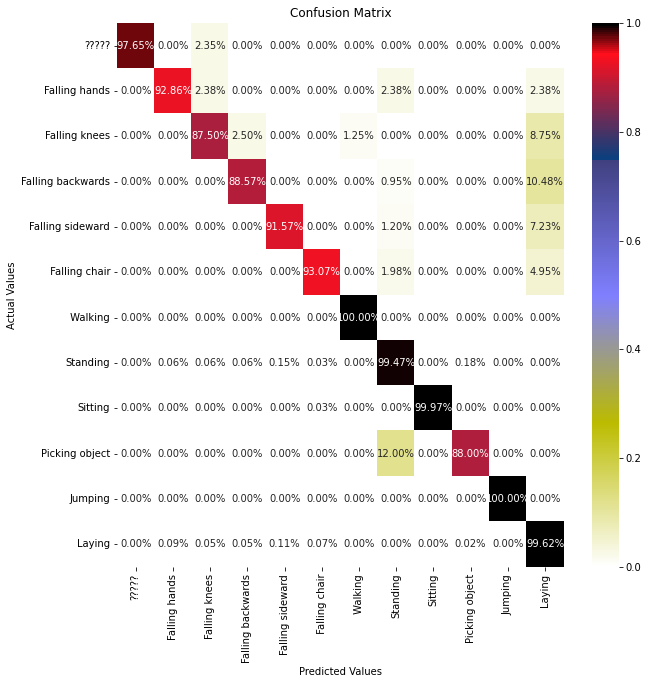

[0.9765, 0.9286, 0.875, 0.8857, 0.9157, 0.9307, 1.0, 0.9947, 0.9997, 0.88, 1.0, 0.9962]


In [ ]:
# LOAD OUR PRE-TRAINED WEIGHT 

model_concat1 = model_concat(method = 'max')

model_concat1.compile(
                 optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.9, rho=0.95, epsilon=1e-08, decay=0.0),
                 loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
                 metrics = [
                            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                            keras.metrics.Precision(name='precision'),
                            keras.metrics.Recall(name='recall'),
                            tfa.metrics.F1Score( num_classes=12,   
                                                name = 'f1_score',
                                                average='weighted') 
                 ])



print("best model: ")
model_concat1.load_weights('/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-MAX.hdf5')
print(model_concat1.evaluate([X_val_1,X_val_2] , Y_val_2))
print(model_concat1.evaluate([X_test_1,X_test_2] , Y_test_2))


y_val = np.argmax(model_concat1.predict([X_val_1,X_val_2]), axis = 1 )
display_result(y_val_2, y_val)

print('*'*20)
y_test = np.argmax(model_concat1.predict([X_test_1,X_test_2]), axis = 1 )
display_result(y_test_2, y_test)

k = draw_cm(y_test_2,y_test) 
print(k)

In [ ]:
# UNCOMMENT IF U WANT TO TRAIN THE MODEL 

# model_concat1 = model_concat(method = 'max')

# model_concat1.compile(
#                  optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.9, rho=0.95, epsilon=1e-08, decay=0.0),
#                  loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
#                  metrics = [
#                             keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
#                             keras.metrics.Precision(name='precision'),
#                             keras.metrics.Recall(name='recall'),
#                             tfa.metrics.F1Score( num_classes=12,   
#                                                 name = 'f1_score',
#                                                 average='weighted') 
#                  ])

# filepath = '/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-MAX.hdf5'
# f1_callback1 = ModelCheckpoint(filepath, 
#                               monitor='val_f1_score', 
#                               verbose=1, 
#                               save_best_only=True,
#                               mode='max')

# history_img12 =model_concat1.fit(
#                                 [X_train_1,X_train_2],Y_train_2,
#                                 epochs= 30,
#                                 batch_size=  2**8,
#                                 validation_data=([X_val_1,X_val_2],Y_val_2),
#                                 callbacks = [f1_callback1]
#                 )


# print("best model: ")
# model_concat1.load_weights('/content/Saved Model/New/CNN3D-MAX.hdf5')
# print(model_concat1.evaluate([X_val_1,X_val_2] , Y_val_2))
# print(model_concat1.evaluate([X_test_1,X_test_2] , Y_test_2))


# y_val = np.argmax(model_concat1.predict([X_val_1,X_val_2]), axis = 1 )
# display_result(y_val_2, y_val)

# print('*'*20)
# y_test = np.argmax(model_concat1.predict([X_test_1,X_test_2]), axis = 1 )
# display_result(y_test_2, y_test)

## Concat

best model: 
504/504 [==============================] - 17s 12ms/step - loss: 0.0205 - categorical_accuracy: 0.9948 - precision: 0.9950 - recall: 0.9946 - f1_score: 0.9948
[0.02054995484650135, 0.9947819709777832, 0.994966447353363, 0.9945955872535706, 0.9948008060455322]
504/504 [==============================] - 6s 12ms/step - loss: 0.0190 - categorical_accuracy: 0.9949 - precision: 0.9950 - recall: 0.9947 - f1_score: 0.9949
[0.01896629109978676, 0.9949065446853638, 0.9950289130210876, 0.9946580529212952, 0.994893491268158]
Accuracy score :  0.9947819604919865
Precision score :  0.994848187891157
Recall score :  0.9947819604919865
F1 score :  0.9948008586025693
********************
Accuracy score :  0.9949065159326667
Precision score :  0.9949021250635611
Recall score :  0.9949065159326667
F1 score :  0.99489349511783


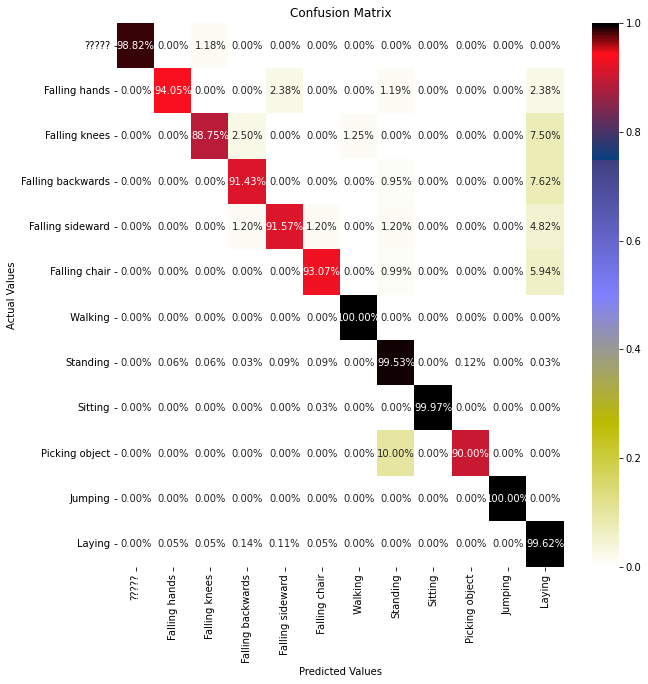

[0.9882, 0.9405, 0.8875, 0.9143, 0.9157, 0.9307, 1.0, 0.9953, 0.9997, 0.9, 1.0, 0.9962]


In [13]:

model_concat1 = model_concat(method = 'concat')



model_concat1.compile(
                 optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.95, rho=0.95, epsilon=1e-08, decay=0.0),
                 loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
                 metrics = [
                            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                            keras.metrics.Precision(name='precision'),
                            keras.metrics.Recall(name='recall'),
                            tfa.metrics.F1Score( num_classes=12,   
                                                name = 'f1_score',
                                                average='weighted') 
                 ])



print("best model: ")
model_concat1.load_weights('/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-CONCAT.hdf5')
print(model_concat1.evaluate([X_val_1,X_val_2] , Y_val_2))
print(model_concat1.evaluate([X_test_1,X_test_2] , Y_test_2))


y_val = np.argmax(model_concat1.predict([X_val_1,X_val_2]), axis = 1 )
display_result(y_val_2, y_val)

print('*'*20)
y_test = np.argmax(model_concat1.predict([X_test_1,X_test_2]), axis = 1 )
display_result(y_test_2, y_test)


k = draw_cm(y_test_2,y_test) 
print(k)


In [15]:
# UNCOMMENT IF U WANT TO TRAIN THE MODEL 

# model_concat1 = model_concat(method = 'concat')

# model_concat1.compile(
#                  optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.94, rho=0.95, epsilon=1e-08, decay=0.0),
#                  loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
#                  metrics = [
#                             keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
#                             keras.metrics.Precision(name='precision'),
#                             keras.metrics.Recall(name='recall'),
#                             tfa.metrics.F1Score( num_classes=12,   
#                                                 name = 'f1_score',
#                                                 average='weighted') 
#                  ])

# filepath = '/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-CC-5.hdf5'
# f1_callback1 = ModelCheckpoint(filepath, 
#                               monitor='val_f1_score', 
#                               verbose=1, 
#                               save_best_only=True,
#                               mode='max')

# history_img12 =model_concat1.fit(
#                                 [X_train_1,X_train_2],Y_train_2,
#                                 epochs= 30,
#                                 batch_size=  2**8,
#                                 validation_data=([X_val_1,X_val_2],Y_val_2),
#                                 callbacks = [f1_callback1]
#                 )


# print("best model: ")
# model_concat1.load_weights('/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-CC-5.hdf5')
# print(model_concat1.evaluate([X_val_1,X_val_2] , Y_val_2))
# print(model_concat1.evaluate([X_test_1,X_test_2] , Y_test_2))


# y_val = np.argmax(model_concat1.predict([X_val_1,X_val_2]), axis = 1 )
# display_result(y_val_2, y_val)

# print('*'*20)
# y_test = np.argmax(model_concat1.predict([X_test_1,X_test_2]), axis = 1 )
# display_result(y_test_2, y_test)

## Average

In [16]:
model_concat1 = model_concat(method = 'average')


model_concat1.compile(
                 optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.98, rho=0.95, epsilon=1e-08, decay=0.0),
                 loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
                 metrics = [
                            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                            keras.metrics.Precision(name='precision'),
                            keras.metrics.Recall(name='recall'),
                            tfa.metrics.F1Score( num_classes=12,   
                                                name = 'f1_score',
                                                average='weighted') 
                 ])



print("best model: ")
model_concat1.load_weights( '/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-AVG.hdf5')
print(model_concat1.evaluate([X_val_1,X_val_2] , Y_val_2))
print(model_concat1.evaluate([X_test_1,X_test_2] , Y_test_2))


y_val = np.argmax(model_concat1.predict([X_val_1,X_val_2]), axis = 1 )
display_result(y_val_2, y_val)

print('*'*20)
y_test = np.argmax(model_concat1.predict([X_test_1,X_test_2]), axis = 1 )
display_result(y_test_2, y_test)


best model: 
504/504 [==============================] - 7s 12ms/step - loss: 0.0212 - categorical_accuracy: 0.9951 - precision: 0.9953 - recall: 0.9950 - f1_score: 0.9950
[0.02119724079966545, 0.9950925707817078, 0.9952777624130249, 0.9950304627418518, 0.9950488805770874]
504/504 [==============================] - 6s 12ms/step - loss: 0.0212 - categorical_accuracy: 0.9951 - precision: 0.9952 - recall: 0.9950 - f1_score: 0.9950
[0.021207721903920174, 0.9950928688049316, 0.9952161908149719, 0.9950307607650757, 0.9950354099273682]
Accuracy score :  0.9950925580817492
Precision score :  0.9950617685198192
Recall score :  0.9950925580817492
F1 score :  0.9950488831060472
********************
Accuracy score :  0.9950928629107398
Precision score :  0.99503786076351
Recall score :  0.9950928629107398
F1 score :  0.9950354546026855


In [ ]:
# UNCOMMENT IF U WANT TO TRAIN THE MODEL 

# model_concat1 = model_concat(method = 'average')

# model_concat1.compile(
#                  optimizer = tf.keras.optimizers.Adadelta(learning_rate= 0.98, rho=0.95, epsilon=1e-08, decay=0.0),
#                  loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
#                  metrics = [
#                             keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
#                             keras.metrics.Precision(name='precision'),
#                             keras.metrics.Recall(name='recall'),
#                             tfa.metrics.F1Score( num_classes=12,   
#                                                 name = 'f1_score',
#                                                 average='weighted') 
#                  ])

# filepath = '/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-AVG.hdf5'
# f1_callback1 = ModelCheckpoint(filepath, 
#                               monitor='val_f1_score', 
#                               verbose=1, 
#                               save_best_only=True,
#                               mode='max')

# history_img12 =model_concat1.fit(
#                                 [X_train_1,X_train_2],Y_train_2,
#                                 epochs= 30,
#                                 batch_size=  2**8,
#                                 validation_data=([X_val_1,X_val_2],Y_val_2),
#                                 callbacks = [f1_callback1]
#                 )


# print("best model: ")
# model_concat1.load_weights('/content/drive/MyDrive/Colab Notebooks/Journal/Saved Model/CNN3D-AVG.hdf5')
# print(model_concat1.evaluate([X_val_1,X_val_2] , Y_val_2))
# print(model_concat1.evaluate([X_test_1,X_test_2] , Y_test_2))


# y_val = np.argmax(model_concat1.predict([X_val_1,X_val_2]), axis = 1 )
# display_result(y_val_2, y_val)

# print('*'*20)
# y_test = np.argmax(model_concat1.predict([X_test_1,X_test_2]), axis = 1 )
# display_result(y_test_2, y_test)